## Installing Packages

CartPole-v0
A non-actuated hinge that travels in a smooth orbit connects the rod to the carriage. The controlling mechanism is delivering a force of +1 or 1 to the cart. The pendulum begins upright in order to prevent falls. Every time step in which the bar remains upright will result in a +1 reward. When the bar is more than 15 degrees from vertical or the cart is more than 2.4 units from the centre, the episode finishes.

GYM
Gym is a Python library that allows you to create and compare reinforcement learning algorithms. It includes a common API for communication between learning algorithms and environments, as well as a variety of environments that are consistent with that API. Since its inception, Gym's API has become the industry standard for achieving this.

In [9]:
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install mitdeeplearning

# Installing dependencies for visualizing 

!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!apt-get install swig
!pip install gym pyvirtualdisplay scikit-video > /dev/null 2>&1

# Installing system dependencies

!apt-get install -y xvfb x11-utils

# Installing python dependencies

!pip install gym

!pip install mitdeeplearning

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [10]:
# Importing libraries 

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
import pandas as pd
import seaborn as sns
from collections import deque
from tensorflow.keras.layers import Dense, Input
%tensorflow_version 2.x
import tensorflow as tf

import numpy as np           
import gym                  
import random               
import base64, io, time
import IPython, functools
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

import copy
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import math
import torchvision.transforms as T
import mitdeeplearning as mdl

In [11]:
# Creating the gym environment

env = gym.envs.make("CartPole-v0")
env.render()



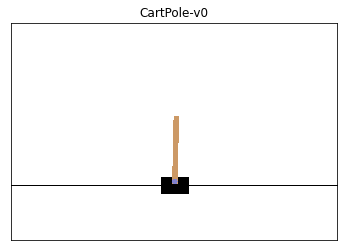

[ 0.00668553  0.21494034  0.02365323 -0.24320336]


In [12]:
 # Gym Environment

def show_plot():
    show = env.render(mode='rgb_array').transpose((2, 0, 1))
    show = np.ascontiguousarray(show, dtype=np.float32) / 255.
    return torch.from_numpy(show)


steps = 50


for i in range(steps):
    clear_output(wait=True)
    env.reset()
    o, r, d, i = env.step(env.action_space.sample())
    plt.figure()
    plt.imshow(show_plot().cpu().permute(1, 2, 0).numpy(),
               interpolation='none')
    plt.title('CartPole-v0')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print(o)

In [13]:
# Q Table/Q-Learning/ Initializing Hyperparameters

total_episodes = 10000          
total_test_episodes = 1000      
max_steps = 99                  

learning_rate = 0.7             # Learning rate
gamma = 0.6                     # Discount rate

#Exploration Parameters
epsilon = 1.0                   # Exploration rate
max_epsilon = 1.0               # Maximum exploration probability
min_epsilon = 0.01              # Minimum exploration probability
decay_rate = 0.01               # Exponential decay rate for exploration probability


# Conclusion

The fastest solution was achieved in 247 episodes with parameters gamma = 0.995 and learning rate = 0.15. The overall findings tend to be better with a higher gamma of around 0.995. Of course, the random distribution of values in the Q-table plays an important role in reaching a quick answer.
The average reward across 1000 episodes provides a more accurate picture of performance. After 5000 episodes, the average payment was about 149, and after 10,000 episodes, the average score was approximately 168, which is considered a success.
Overall, Q-learning is a good way of learning in simple environments with few steps, where the agent can recall and duplicate earlier actions. In increasingly complicated issues, the Q-table would be unable to manage a large number of states and operations, rendering it impractical to use.

In [6]:
# Preprocessing 

env.reset()
total_epochs = []
total_penalties = []
total_reward = []
frames = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    epochs, penalties, reward = 0,0,0

    while not done:
        #env.render()
        action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

        total_reward.append(reward)

        frames.append({'episode': episode, 'frames': env.render(mode='ansi'), 'state': state, 'action': action, 'reward': reward})

        state = new_state
    total_penalties.append(penalties)
    total_epochs.append(epochs)

In [7]:
# Visualizing the performance 

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        
        if i == 100:
            break

        print(f"Episode: {frame['episode']}")
        print(frame['frames'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.6)
        
        
        
print_frames(frames)

Episode: 3
True
Timestep: 100
State: [ 0.05655362  0.58029619 -0.06240084 -0.8647637 ]
Action: 1
Reward: 1.0


In [8]:
# Results

print(f"Results after {total_test_episodes} episodes:")
print(f"Average timesteps per episode: {sum(total_epochs)/ total_test_episodes}")
print(f"Average reward per timesteps: {sum(total_reward) / sum(total_epochs)}")
print(f"Average penalties per episode: {sum(total_penalties) / total_test_episodes}")

Results after 1000 episodes:
Average timesteps per episode: 22.234
Average reward per timesteps: 1.0
Average penalties per episode: 0.0


In [37]:
avg_ts_nrl = sum(total_epochs)/ total_episodes
avg_reward_nrl = sum(total_reward) / sum(total_epochs)
avg_penalties_nrl = sum(total_penalties) / total_test_episodes

 ## Solving the environment with Reinforcement Learning

 
# Step:4 Create the Q-Table

*  To create our Qtable, we need to know how rows and columns we need, i.e., our states and actions. We have to calculate the action_size and state_size.
*  OpenAI Gym has a way to do that.



In [10]:
# returns how much actions our environment has

action_size = env.action_space.n        
print("Action Size = ", action_size)

#returns how much sate our environment has

state_size = env.observation_space.shape[0]    
print("State Size = ", state_size)

Action Size =  2
State Size =  4


In [11]:
#Initializing our Qtable as a null matrix

qtable = np.zeros((state_size,action_size))     
print(qtable)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


#  Implementing Q-learning Algorithm

In [12]:
# Reward List

rewards = []


for episode in range(total_episodes):
    
    # Resetting the environment
    
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        
        # Choosing an action (a) in the current world state (s)
        
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state.astype(int),:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        
        new_state, reward, done, info = env.step(action)

        prev_q = qtable[state.astype(int),action]

        prev_q  =  prev_q  + learning_rate * (reward + gamma * (np.max(qtable[new_state.astype(int), :])) -  prev_q )
      
        total_rewards += reward
        
        # Our new state is state
        
        state = new_state
        
        # If done (if we're dead) : finish episode
        
        if done == True: 
            break
        
    # Reducing epsilon,because we need less exploration
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 

    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score over time: 4.515


In [13]:
# Evaluating the agent

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("EPISODE ", episode)

    for step in range(max_steps):
        
 # Taking the index that have the maximum expected future reward given that state

        action = np.argmax(qtable[state.astype(int),:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            
            env.render()
            
            # We print the number of step it took.
            
            print("Number of steps", step)
            break
        state = new_state
env.close()

EPISODE  0
Number of steps 8
EPISODE  1
Number of steps 8
EPISODE  2
Number of steps 9
EPISODE  3
Number of steps 9
EPISODE  4
Number of steps 9


In [39]:
# Frames 

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        
        if frame['episode'] == 5:
            break

        print(f"Episode: {frame['episode']}")
        print(frame['frames'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.6)
        
        
        
print_frames(frames)

Episode: 4
True
Timestep: 124
State: [ 0.08501469  1.1428951  -0.20388453 -2.00400319]
Action: 1
Reward: 1.0


In [40]:
print(f"Results after {total_test_episodes} episodes:")
print(f"Average timesteps per episode: {sum(total_epochs)/ total_test_episodes}")
print(f"Average reward per timestep: {sum(total_reward) / sum(total_epochs)}")
print(f"Average penalties per episode: {sum(total_penalties) / total_test_episodes}")

Results after 1000 episodes:
Average timesteps per episode: 22.234
Average reward per timestep: 1.0
Average penalties per episode: 0.0


In [41]:
avg_ts_rl = sum(total_epochs)/ total_test_episodes
avg_reward_rl = sum(total_reward) / sum(total_epochs)
avg_penalties_rl = sum(total_penalties) / total_test_episodes

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [42]:
models = [("Random agent's performance", avg_reward_nrl, avg_penalties_nrl, avg_ts_nrl),("Q-learning agent's performance", avg_reward_rl, avg_penalties_rl, avg_ts_rl)]

In [43]:
Algorithms = pd.DataFrame(data = models, columns=['Model', "Average rewards per move", "Average number of penalties per episode", "Average number of timesteps per trip"])

In [48]:
# Comparing the performance of the random agent to the RL-Agent

Algorithms

,Model,Average rewards per move,Average number of penalties per episode,Average number of timesteps per trip
0,Random agent's performance,1.0,0.0,2.2234
1,Q-learning agent's performance,1.0,0.0,22.2340


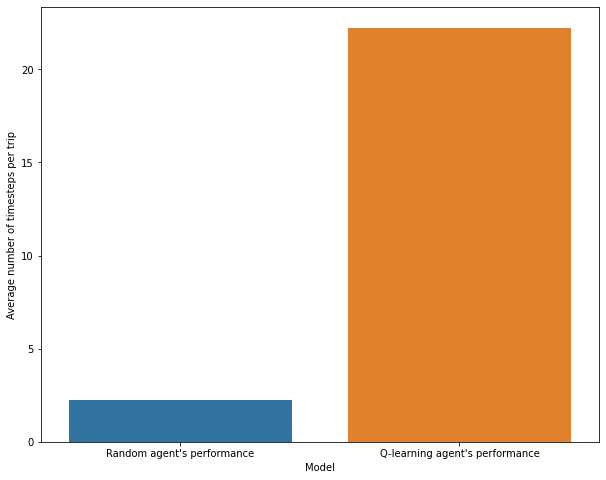

In [50]:
plt.figure(figsize=(10,8))

sns.barplot(x = 'Model', y = 'Average number of timesteps per trip', data = Algorithms)
plt.show()

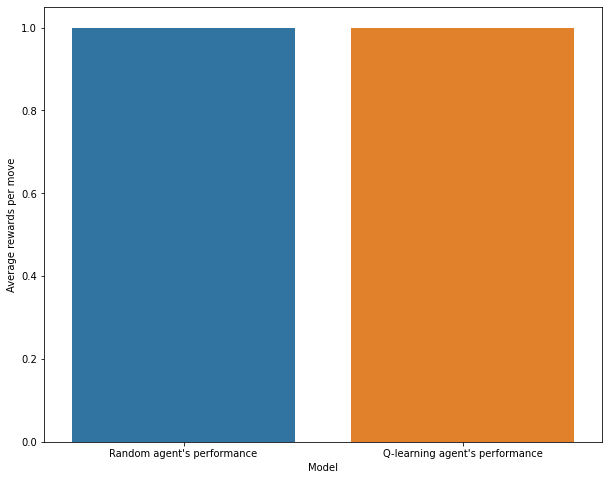

In [51]:
plt.figure(figsize=(10,8))

sns.barplot(x = 'Model', y = 'Average rewards per move', data = Algorithms)
plt.show()

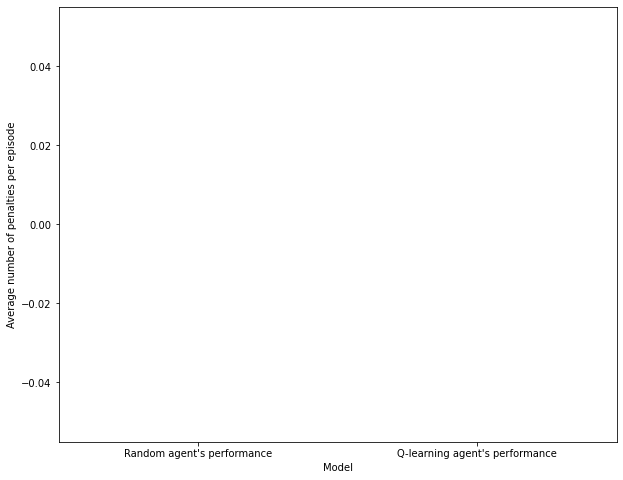

In [52]:
plt.figure(figsize=(10,8))

sns.barplot(x = 'Model', y = 'Average number of penalties per episode', data = Algorithms)
plt.show()

#  Part 2 Deep-Q Network Algorithm using Keras RL

In [53]:
!pip install gym keras-rl2

     |████████████████████████████████| 52 kB 674 kB/s 


In [57]:
!python -m atari_py.import_roms .


In [58]:
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils
apt-get install imagemagick

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gt

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/imagemagick-6-common_6.9.7.4+dfsg-16ubuntu6.11_all.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/libmagickcore-6.q16-3_6.9.7.4+dfsg-16ubuntu6.11_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/libmagickwand-6.q16-3_6.9.7.4+dfsg-16ubuntu6.11_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/imagemagick-6.q16_6.9.7.4+dfsg-16ubuntu6.11_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/imagemagick_6.9.7.4+dfsg-16ubuntu6.11_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/i/imagemagick/libmagickcore-6.q16-3-extra_6.9.7.4+dfsg-16ubuntu6.11_amd64.deb  404  

In [16]:
# Importing extra libraries

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900)) # use False with Xvfb 
_ = _display.start()

import gym
from gym import wrappers
import numpy as np
import random
import math
import base64
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML
from IPython import display
from matplotlib import animation
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

import os
import io

In [30]:
env.reset()
total_epochs = []
total_penalties = []
total_reward = []
frames = []

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    epochs, penalties, reward = 0,0,0

    while not done:
        #env.render()
        action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

        total_reward.append(reward)

        frames.append({'episode': episode, 'frames': env.render(mode='rgb_array'), 'state': state, 'action': action, 'reward': reward})

        state = new_state
    total_penalties.append(penalties)
    total_epochs.append(epochs)

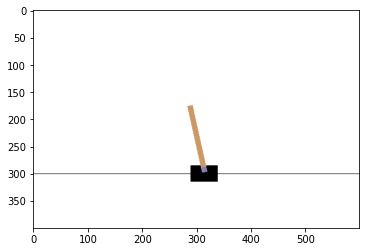

In [31]:
from IPython.display import clear_output
from time import sleep
img = plt.imshow(env.render(mode='rgb_array'))

def print_frames(frames):
    for i, frame in enumerate(frames):
        img.set_data(frame['frames']) # just update the data

        display.display(plt.gcf())
        
        if i == 100:
            break

        print(f"Episode: {frame['episode']}")
        #print(frame['frames'])
        print(f"Timestep: {i + 1}")
        #print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.5)
        
        clear_output(wait=True)
        
        
        
print_frames(frames)

In [43]:
# Side Track: Vectorization
    
tmp_array = []
for i in range(100):
    tmp_array.append(i)
    
#Add 10 to each element
for i in range(100):
    tmp_array[i] += 10
print(tmp_array)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


In [44]:
tmp_array = []
for i in range(100):
    tmp_array.append(i)
    
#Add 10 to each element
tmp_array = np.array(tmp_array) + 10
print(tmp_array)

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109]


In [45]:
# Global Variables

EPISODES = 500
TRAIN_END = 0

In [46]:
# Hyper Parameters

# Gamma

def discount_rate(): 
    return 0.95

# Alpha

def learning_rate(): 
    return 0.001

#Size of the batch used in the experience replay

def batch_size(): 
    return 24

In [47]:
class DeepQNetwork():
    def __init__(self, states, actions, alpha, gamma, epsilon,epsilon_min, epsilon_decay):
        self.nS = states
        self.nA = actions
        self.memory = deque([], maxlen=2500)
        self.alpha = alpha
        self.gamma = gamma
        
        #Explore/Exploit
        
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = self.build_model()
        self.loss = []
        
    def build_model(self):
        model = keras.Sequential() #linear stack of layers https://keras.io/models/sequential/
        model.add(keras.layers.Dense(24, input_dim=self.nS, activation='relu')) #[Input] -> Layer 1
        #   Dense: Densely connected layer https://keras.io/layers/core/
        #   24: Number of neurons
        #   input_dim: Number of input variables
        #   activation: Rectified Linear Unit (relu) ranges >= 0
        model.add(keras.layers.Dense(24, activation='relu')) #Layer 2 -> 3
        model.add(keras.layers.Dense(self.nA, activation='linear')) #Layer 3 -> [output]
        #   Size has to match the output (different actions)
        #   Linear activation on the last layer
        model.compile(loss='mean_squared_error', #Loss function: Mean Squared Error
                      optimizer=keras.optimizers.Adam(lr=self.alpha)) #Optimaizer: Adam (Feel free to check other options)
        return model

    def action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.nA) #Explore
        action_vals = self.model.predict(state) #Exploit: Use the NN to predict the correct action from this state
        return np.argmax(action_vals[0])

    def test_action(self, state): #Exploit
        action_vals = self.model.predict(state)
        return np.argmax(action_vals[0])

    def store(self, state, action, reward, nstate, done):
        #Store the experience in memory
        self.memory.append( (state, action, reward, nstate, done) )

    def experience_replay(self, batch_size):
        #Execute the experience replay
        minibatch = random.sample( self.memory, batch_size ) #Randomly sample from memory

        # Converting to numpy for speed by vectorization
        
        x = []
        y = []
        np_array = np.array(minibatch)
        st = np.zeros((0,self.nS)) #States
        nst = np.zeros( (0,self.nS) )#Next States
        for i in range(len(np_array)): #Creating the state and next state np arrays
            st = np.append( st, np_array[i,0], axis=0)
            nst = np.append( nst, np_array[i,3], axis=0)
        st_predict = self.model.predict(st) #Here is the speedup! I can predict on the ENTIRE batch
        nst_predict = self.model.predict(nst)
        index = 0
        for state, action, reward, nstate, done in minibatch:
            x.append(state)
            
            #Predicting from state
            
            nst_action_predict_model = nst_predict[index]
            if done == True: #Terminal: Just assign reward much like {* (not done) - QB[state][action]}
                target = reward
            else:   #Non terminal
                target = reward + self.gamma * np.amax(nst_action_predict_model)
            target_f = st_predict[index]
            target_f[action] = target
            y.append(target_f)
            index += 1
            
        #Reshape for Keras Fit
        x_reshape = np.array(x).reshape(batch_size,self.nS)
        y_reshape = np.array(y)
        epoch_count = 1 #Epochs is the number or iterations
        hist = self.model.fit(x_reshape, y_reshape, epochs=epoch_count, verbose=0)
        
        #Graph Losses
        
        for i in range(epoch_count):
            self.loss.append( hist.history['loss'][i] )
            
        #Decay Epsilon
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [49]:
# Creating the agent

nS = env.observation_space.shape[0] #This is only 4
nA = env.action_space.n #Actions
dqn = DeepQNetwork(nS, nA, learning_rate(), discount_rate(), 1, 0.001, 0.995 )

batch_size = batch_size()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [50]:
# Training

# Storing rewards for graphing

rewards = [] 

# Storing the Explore/Exploit

epsilons = [] 
TEST_Episodes = 0
for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, nS]) 
    
    # Resize to store in memory to pass to .predict
    tot_rewards = 0
    for time in range(210): #200 is when you "solve" the game. This can continue forever as far as I know
        action = dqn.action(state)
        nstate, reward, done, _ = env.step(action)
        nstate = np.reshape(nstate, [1, nS])
        tot_rewards += reward
        dqn.store(state, action, reward, nstate, done) # Resize to store in memory to pass to .predict
        state = nstate
        #done: CartPole fell. 
        #time == 209: CartPole stayed upright
        if done or time == 209:
            rewards.append(tot_rewards)
            epsilons.append(dqn.epsilon)
            print("episode: {}/{}, score: {}, e: {}"
                  .format(e, EPISODES, tot_rewards, dqn.epsilon))
            break
        #Experience Replay
        if len(dqn.memory) > batch_size:
            dqn.experience_replay(batch_size)
    #If our current NN passes we are done
    #I am going to use the last 5 runs
    if len(rewards) > 5 and np.average(rewards[-5:]) > 195:
        #Set the rest of the EPISODES for testing
        TEST_Episodes = EPISODES - e
        TRAIN_END = e
        break

episode: 0/500, score: 11.0, e: 1
episode: 1/500, score: 13.0, e: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 2/500, score: 15.0, e: 0.9322301194154049
episode: 3/500, score: 65.0, e: 0.6763948591909945
episode: 4/500, score: 23.0, e: 0.6057704364907278
episode: 5/500, score: 13.0, e: 0.5704072587541458
episode: 6/500, score: 22.0, e: 0.5134164023722473
episode: 7/500, score: 15.0, e: 0.47862223409330756
episode: 8/500, score: 11.0, e: 0.45522245551230495
episode: 9/500, score: 12.0, e: 0.43080185560799106
episode: 10/500, score: 19.0, e: 0.3936343764094253
episode: 11/500, score: 9.0, e: 0.37816180712868996
episode: 12/500, score: 15.0, e: 0.35253382661792404
episode: 13/500, score: 11.0, e: 0.3352984938281715
episode: 14/500, score: 10.0, e: 0.32050833588933575
episode: 15/500, score: 13.0, e: 0.3017979588795719
episode: 16/500, score: 10.0, e: 0.2884855236625661
episode: 17/500, score: 12.0, e: 0.2730095965279488
episode: 18/500, score: 11.0, e: 0.25966219297210513
episode: 19/500, score: 11.0, e: 0.24696734223472733
episode: 20/500, score: 9.0, e: 0.23725980767521673
episode: 21/5

In [52]:
#Testing the agent that already trained 

#   In this section we ALWAYS use exploit and don't train any more

for e_test in range(TEST_Episodes):
    state = env.reset()
    state = np.reshape(state, [1, nS])
    tot_rewards = 0
    for t_test in range(210):
        action = dqn.test_action(state)
        nstate, reward, done, _ = env.step(action)
        nstate = np.reshape( nstate, [1, nS])
        tot_rewards += reward
        
        #DON'T STORE ANYTHING DURING TESTING
        
        state = nstate
        
        #done: CartPole fell. 
        #t_test == 209: CartPole stayed upright
        if done or t_test == 209: 
            rewards.append(tot_rewards)
            epsilons.append(0) #We are doing full exploit
            print("episode: {}/{}, score: {}, e: {}"
                  .format(e_test, TEST_Episodes, tot_rewards, 0))
            break;

episode: 0/391, score: 200.0, e: 0
episode: 1/391, score: 200.0, e: 0
episode: 2/391, score: 183.0, e: 0
episode: 3/391, score: 177.0, e: 0
episode: 4/391, score: 200.0, e: 0
episode: 5/391, score: 200.0, e: 0
episode: 6/391, score: 185.0, e: 0
episode: 7/391, score: 200.0, e: 0
episode: 8/391, score: 200.0, e: 0
episode: 9/391, score: 200.0, e: 0
episode: 10/391, score: 200.0, e: 0
episode: 11/391, score: 200.0, e: 0
episode: 12/391, score: 200.0, e: 0
episode: 13/391, score: 200.0, e: 0
episode: 14/391, score: 160.0, e: 0
episode: 15/391, score: 200.0, e: 0
episode: 16/391, score: 193.0, e: 0
episode: 17/391, score: 200.0, e: 0
episode: 18/391, score: 200.0, e: 0
episode: 19/391, score: 200.0, e: 0
episode: 20/391, score: 200.0, e: 0
episode: 21/391, score: 200.0, e: 0
episode: 22/391, score: 174.0, e: 0
episode: 23/391, score: 200.0, e: 0
episode: 24/391, score: 189.0, e: 0
episode: 25/391, score: 200.0, e: 0
episode: 26/391, score: 200.0, e: 0
episode: 27/391, score: 200.0, e: 0
ep

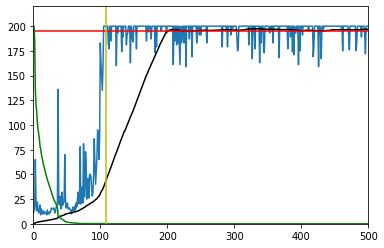

In [ ]:
rolling_average = np.convolve(rewards, np.ones(100)/100)

plt.plot(rewards)
plt.plot(rolling_average, color='black')
plt.axhline(y=195, color='r', linestyle='-') 

#Scale Epsilon to match reward (0 - 200) range

eps_graph = [200*x for x in epsilons]
plt.plot(eps_graph, color='g', linestyle='-')

#Plot the line where TESTING begins

plt.axvline(x=TRAIN_END, color='y', linestyle='-')
plt.xlim( (0,EPISODES) )
plt.ylim( (0,220) )
plt.show()


env.close()

# Results

If everything was done correctly we should see the rewards () over the red line.  

Black is the 100 episode rolling average  
Red is the "solved" line at 195  
Blue is the reward for each episode  
Green is the value of epsilon scaled by 200  
Yellow is where the tests started.


# References

- Lecture Notes
- Google collab research community

